In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import CSV file in Dataframe
sales_22 = pd.read_csv('Sales _2022.csv')
sales_22.rename(columns = {'Store Long Label':'Countries'}, inplace = True)
print(sales_22.head())

   Year     Month Week Retail Code               Countries Turnover in EUR  \
0  2022  February  W06         Q93  CLIENT SERVICE DENMARK          10 077   
1  2022     April  W17         Q93  CLIENT SERVICE DENMARK          16 071   
2  2022      June  W26         Q93  CLIENT SERVICE DENMARK          10 141   
3  2022     April  W14         A90   CLIENT SERVICE FRANCE         187 844   
4  2022       May  W21         A90   CLIENT SERVICE FRANCE         178 956   

  Commercial Sales Quantity Transactions (Scope Retail KPI) SPT in EUR   UPT  
0                         7                              13      1 110  1.00  
1                        15                              18        929  1.00  
2                        13                              15        839  1.00  
3                       269                             225        889  1.24  
4                       231                             243        805  1.01  


In [3]:
#showing understanding of the shape of the Dataframe and exploring Datatypes
sales_22.shape

(1482, 10)

In [4]:
sales_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1482 non-null   int64  
 1   Month                            1482 non-null   object 
 2   Week                             1482 non-null   object 
 3   Retail Code                      1482 non-null   object 
 4   Countries                        1482 non-null   object 
 5   Turnover in EUR                  1482 non-null   object 
 6   Commercial Sales Quantity        1482 non-null   object 
 7   Transactions (Scope Retail KPI)  1482 non-null   object 
 8   SPT in EUR                       1457 non-null   object 
 9   UPT                              1457 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 115.9+ KB


In [5]:
sales_22.dtypes

Year                                 int64
Month                               object
Week                                object
Retail Code                         object
Countries                           object
Turnover in EUR                     object
Commercial Sales Quantity           object
Transactions (Scope Retail KPI)     object
SPT in EUR                          object
UPT                                float64
dtype: object

In [6]:
sales_22.head()

,Year,Month,Week,Retail Code,Countries,Turnover in EUR,Commercial Sales Quantity,Transactions (Scope Retail KPI),SPT in EUR,UPT
0,2022,February,W06,Q93,CLIENT SERVICE DENMARK,10 077,7,13,1 110,1.00
1,2022,April,W17,Q93,CLIENT SERVICE DENMARK,16 071,15,18,929,1.00
2,2022,June,W26,Q93,CLIENT SERVICE DENMARK,10 141,13,15,839,1.00
3,2022,April,W14,A90,CLIENT SERVICE FRANCE,187 844,269,225,889,1.24
4,2022,May,W21,A90,CLIENT SERVICE FRANCE,178 956,231,243,805,1.01


In [7]:
#cleaning data
sales_22['Turnover in EUR'] = sales_22['Turnover in EUR'].str.replace(' ', "")

In [8]:
sales_22.head()

,Year,Month,Week,Retail Code,Countries,Turnover in EUR,Commercial Sales Quantity,Transactions (Scope Retail KPI),SPT in EUR,UPT
0,2022,February,W06,Q93,CLIENT SERVICE DENMARK,10077,7,13,1 110,1.00
1,2022,April,W17,Q93,CLIENT SERVICE DENMARK,16071,15,18,929,1.00
2,2022,June,W26,Q93,CLIENT SERVICE DENMARK,10141,13,15,839,1.00
3,2022,April,W14,A90,CLIENT SERVICE FRANCE,187844,269,225,889,1.24
4,2022,May,W21,A90,CLIENT SERVICE FRANCE,178956,231,243,805,1.01


In [35]:
sales_22['Turnover in EUR'] = pd.to_numeric(sales_22["Turnover in EUR"], errors='coerce')
sales_22['Transactions (Scope Retail KPI)'] = pd.to_numeric(sales_22['Transactions (Scope Retail KPI)'], errors='coerce')

In [36]:
sales_22.dtypes

Year                                 int64
Month                               object
Week                                object
Retail Code                         object
Countries                           object
Turnover in EUR                      int64
Commercial Sales Quantity           object
Transactions (Scope Retail KPI)    float64
SPT in EUR                          object
UPT                                float64
dtype: object

In [11]:
#when first viewing the data the months on the graph below were out of order, adding this helped fix the issue
month_dict={'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9,'October':10, 'November':11, 'December':12}
sales_22=sales_22.sort_values('Month', key = lambda x: x.apply (lambda x : month_dict[x]))

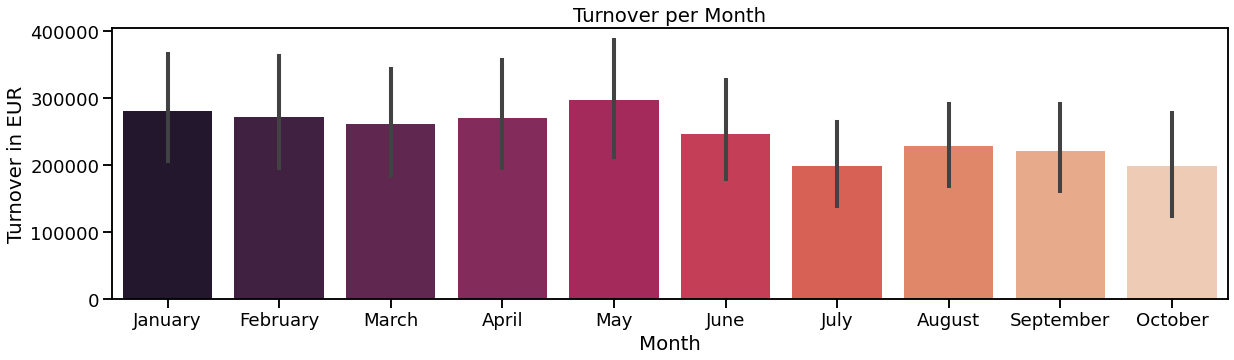

In [63]:
#exploring the initial data
plt.figure(figsize=(20,5))
sns.barplot(x="Month", y="Turnover in EUR", data= sales_22, palette="rocket").set(title='Turnover per Month')
plt.show()

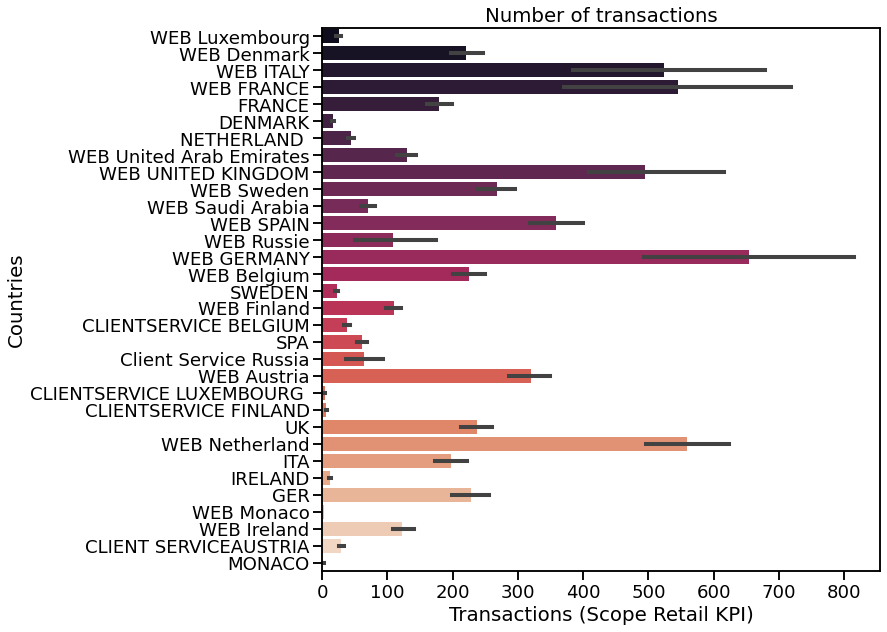

In [45]:
#exploring the initial data
plt.figure(figsize=(10,10))
sns.barplot(x="Transactions (Scope Retail KPI)", y="Countries", data= sales_22, palette="rocket").set(title='Number of transactions')
plt.show()

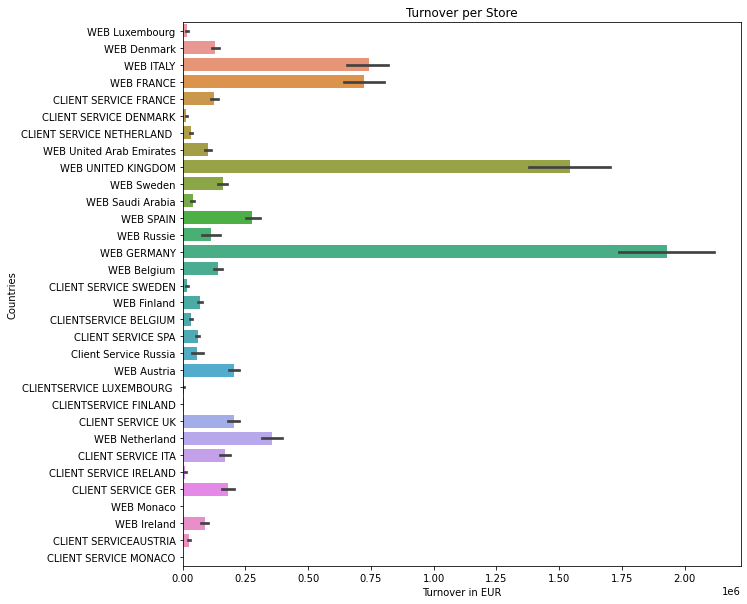

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(x='Turnover in EUR', y='Countries', data= sales_22).set(title='Turnover per Store')
plt.show()

In [15]:
import requests

In [16]:
avg_salaries = pd.read_csv('european average salaries.csv')
avg_salaries['2022'] = avg_salaries['2022'].str.replace('€', "")
avg_salaries['2022'] = avg_salaries['2022'].str.replace(',', "")
avg_salaries['2022'] = avg_salaries['2022'].str.replace('.00', "")
print(avg_salaries.head(10))

   Rank      Country  2022       2020 Change EUR Change %
0   1.0      Denmark  6173  €5,179.00   € 994.00   19.19%
1   2.0   Luxembourg  5143  €5,143.00     € 0.00    0.00%
2   3.0      Austria  4540  €3,811.00   € 729.00   19.13%
3   4.0      Germany  4168  €4,035.00   € 133.00    3.30%
4   5.0       Sweden  4154  €3,194.00   € 960.00   30.06%
5   6.0       France  4130  €3,097.00  €1,033.00   33.35%
6   7.0      Ireland  4049  €3,867.00   € 182.00    4.71%
7   8.0      Belgium  3775  €3,401.00   € 374.00   11.00%
8   9.0      Finland  3380  €3,380.00     € 0.00    0.00%
9  10.0  Netherlands  2808  €2,855.00   -€ 47.00   -1.65%


<ipython-input-16-44be21854ade>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  avg_salaries['2022'] = avg_salaries['2022'].str.replace('.00', "")


In [17]:
avg_salaries.dtypes

Rank          float64
Country        object
2022           object
2020           object
Change EUR     object
Change %       object
dtype: object

In [18]:
avg_salaries['2022'] = pd.to_numeric(avg_salaries["2022"], errors='coerce')

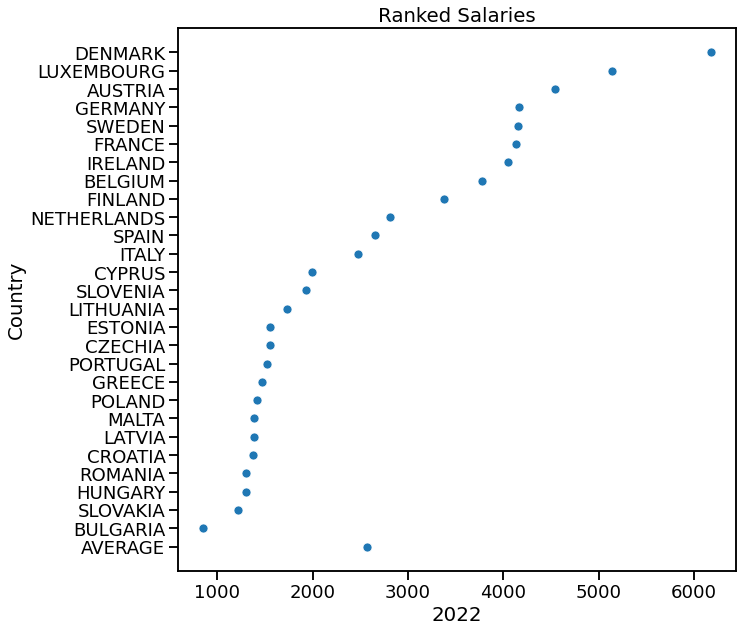

In [51]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='2022', y='Country', data= avg_salaries).set(title='Ranked Salaries')
plt.show()

In [52]:
sales_vs_salaries = sales_22.merge(avg_salaries, left_on= "Countries", right_on= "Country")

In [65]:
sales_vs_salaries.head()

,Year,Month,Week,Retail Code,Countries,Turnover in EUR,Commercial Sales Quantity,Transactions (Scope Retail KPI),SPT in EUR,UPT,Rank,Country,2022,2020,Change EUR,Change %
0,2022,January,W02,A90,FRANCE,133298,220,257.0,655,1.00,6.0,FRANCE,4130.0,"€3,097.00","€1,033.00",33.35%
1,2022,January,W04,A90,FRANCE,189390,250,271.0,809,1.01,6.0,FRANCE,4130.0,"€3,097.00","€1,033.00",33.35%
2,2022,January,W01,A90,FRANCE,216219,381,361.0,687,1.17,6.0,FRANCE,4130.0,"€3,097.00","€1,033.00",33.35%
3,2022,January,W05,A90,FRANCE,40550,45,50.0,869,1.00,6.0,FRANCE,4130.0,"€3,097.00","€1,033.00",33.35%
4,2022,January,W03,A90,FRANCE,144591,232,259.0,640,1.01,6.0,FRANCE,4130.0,"€3,097.00","€1,033.00",33.35%


In [54]:
sales_22.head()

,Year,Month,Week,Retail Code,Countries,Turnover in EUR,Commercial Sales Quantity,Transactions (Scope Retail KPI),SPT in EUR,UPT
876,2022,January,W03,WLU,WEB Luxembourg,23090,31,33.0,787,1.00
504,2022,January,W01,WDK,WEB Denmark,210135,335,426.0,612,1.00
118,2022,January,W02,WIT,WEB ITALY,980314,1 444,NaN,706,1.01
119,2022,January,W04,WIT,WEB ITALY,767523,1 219,NaN,665,1.01
120,2022,January,W05,WIT,WEB ITALY,332203,501,491.0,711,1.01


In [55]:
avg_salaries.head()

,Rank,Country,2022,2020,Change EUR,Change %
0,1.0,DENMARK,6173.0,"€5,179.00",€ 994.00,19.19%
1,2.0,LUXEMBOURG,5143.0,"€5,143.00",€ 0.00,0.00%
2,3.0,AUSTRIA,4540.0,"€3,811.00",€ 729.00,19.13%
3,4.0,GERMANY,4168.0,"€4,035.00",€ 133.00,3.30%
4,5.0,SWEDEN,4154.0,"€3,194.00",€ 960.00,30.06%


In [56]:
sales_22['Countries'] = sales_22['Countries'].str.replace('CLIENT SERVICE ', "")

In [57]:
sales_vs_salaries = sales_22.merge(avg_salaries, left_on= "Countries", right_on= "Country")

In [67]:
sales_vs_salaries.head()

,Year,Month,Week,Retail Code,Countries,Turnover in EUR,Commercial Sales Quantity,Transactions (Scope Retail KPI),SPT in EUR,UPT,Rank,Country,2022,2020,Change EUR,Change %
0,2022,January,W02,A90,FRANCE,133298,220,257.0,655,1.00,6.0,FRANCE,4130.0,"€3,097.00","€1,033.00",33.35%
1,2022,January,W04,A90,FRANCE,189390,250,271.0,809,1.01,6.0,FRANCE,4130.0,"€3,097.00","€1,033.00",33.35%
2,2022,January,W01,A90,FRANCE,216219,381,361.0,687,1.17,6.0,FRANCE,4130.0,"€3,097.00","€1,033.00",33.35%
3,2022,January,W05,A90,FRANCE,40550,45,50.0,869,1.00,6.0,FRANCE,4130.0,"€3,097.00","€1,033.00",33.35%
4,2022,January,W03,A90,FRANCE,144591,232,259.0,640,1.01,6.0,FRANCE,4130.0,"€3,097.00","€1,033.00",33.35%


In [59]:
avg_salaries['Country'] = avg_salaries['Country'].str.upper()

In [60]:
sales_vs_salaries = sales_22.merge(avg_salaries, left_on= "Countries", right_on= "Country")

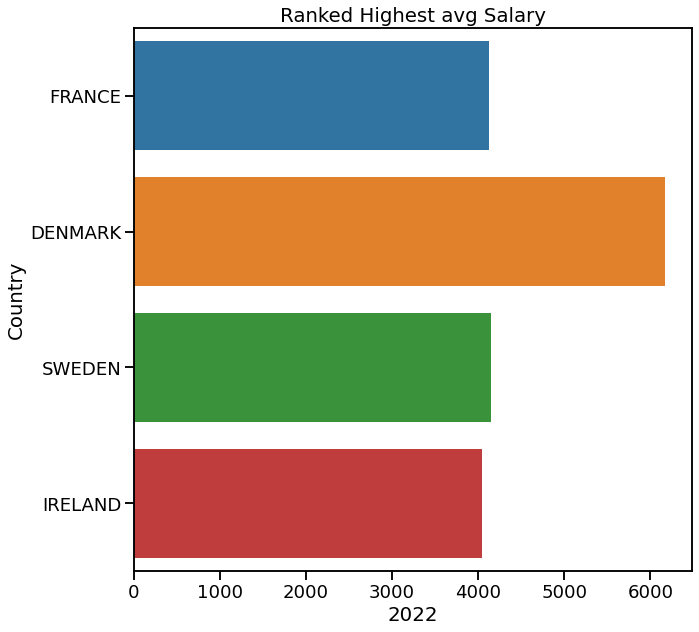

In [62]:
plt.figure(figsize=(10,10))
sns.barplot(x='2022', y='Country', data= sales_vs_salaries).set(title='Ranked Highest avg Salary')
plt.show()

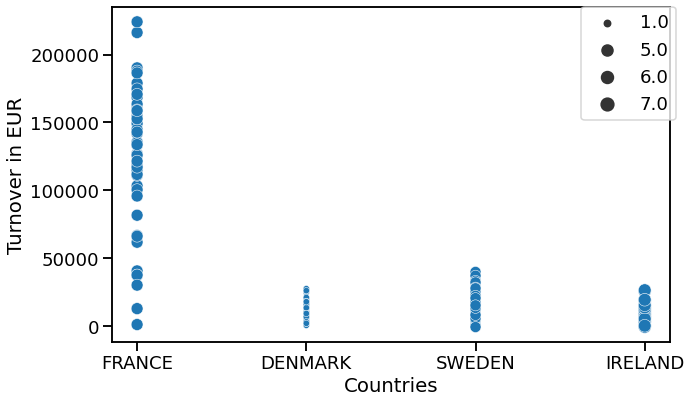

In [33]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10,6))
sns.scatterplot(x="Country", 
                y="Turnover in EUR",
                size="Rank",            
                data=sales_vs_salaries)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.01, 0.54),  borderaxespad=0.)
plt.xlabel("Countries")
plt.ylabel("Turnover in EUR")
plt.tight_layout()
plt.savefig("Bubble_plot_Seaborn_scatterplot.png",
                    format='png',dpi=150)

In [46]:
!git commit -m "final upload"

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   UCD_Project.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Bubble_plot_Seaborn_scatterplot.png
	Countries
	Country
	Month
	Sales _2022.csv
	Untitled1.ipynb
	european average salaries.csv
	european average salaries.xlsx

no changes added to commit (use "git add" and/or "git commit -a")
